<a href="https://colab.research.google.com/github/Felipe-Pinto/python_para_investimentos/blob/master/Avalia%C3%A7%C3%A3o_Op%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vectorbt

In [2]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import vectorbt as vbt
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import rcParams
import mplfinance as mpf

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
Opções =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_19_01.xlsx",)
Opções.tail(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
76,0.03,0.02,0.02,-0.0029,0.0,0.03,0.01,0.03,44.77,0.0,0.0,-9.22,9.22,0.0184,-0.98,8.56,0.00
77,0.03,0.02,0.02,-0.0026,0.0,0.03,0.01,0.03,45.02,0.0,0.0,-0.72,9.47,0.0188,-0.98,8.80,8.75
78,0.02,0.02,0.01,-0.0023,0.0,0.02,0.01,0.03,45.27,0.0,0.0,-9.72,9.72,0.0192,-0.99,9.04,0.00
79,0.03,0.01,0.01,-0.0020,0.0,0.03,0.00,0.03,45.52,0.0,0.0,-9.97,9.97,0.0196,-0.99,9.29,0.00
80,0.02,0.01,0.01,-0.0018,0.0,0.02,0.01,0.03,45.77,0.0,0.0,-10.22,10.22,0.0200,-0.99,9.53,0.00


In [6]:
Opções1 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
Opções1.head(5)

,Último,Preço Teórico,Delta,Theta,Intrínseco,Extrínseco,Bid,Ask,Strike,Bid.1,Ask.1,Extrínseco.1,Intrínseco.1,Theta.1,Delta.1,Preço Teórico.1,Último.1
0,10.60,10.15,1.0,-0.0120,10.04,0.56,9.98,10.31,25.01,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
1,9.99,9.89,1.0,-0.0121,9.78,0.21,9.73,9.98,25.26,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
2,9.68,9.65,1.0,-0.0122,9.54,0.14,9.47,9.67,25.51,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
3,9.51,9.40,1.0,-0.0124,9.29,0.22,9.23,9.42,25.76,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.01
4,9.18,9.15,1.0,-0.0125,9.04,0.14,8.98,9.31,26.01,0.0,0.02,0.01,0.0,0.0,0.0,0.0,0.01


In [7]:
#Opções2 =pd.read_excel("/content/drive/MyDrive/Opções Dados/PETR4_04_12_23_to_15_12.xlsx",)
#Opções2.head(5)

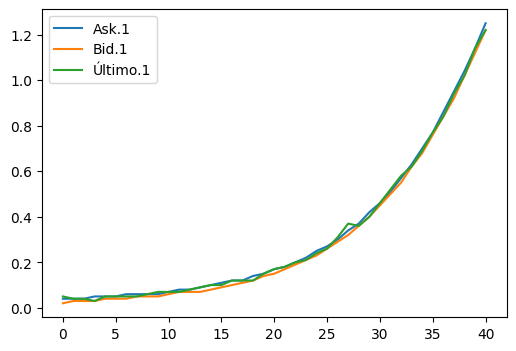

In [8]:
# Ask são os vendedores
# Bid são os compradores
# Último valor negociado
PUTs_OTM = Opções[(Opções['Intrínseco.1']<=0.5)]
PUTs_OTM1 = Opções1[(Opções1['Intrínseco.1']<=0.5)]
#PUTs_OTM2 = Opções2[(Opções2['Intrínseco.1']<=0.5)]
PUTs_OTM[['Ask.1','Bid.1','Último.1']].plot(figsize = (6,4));

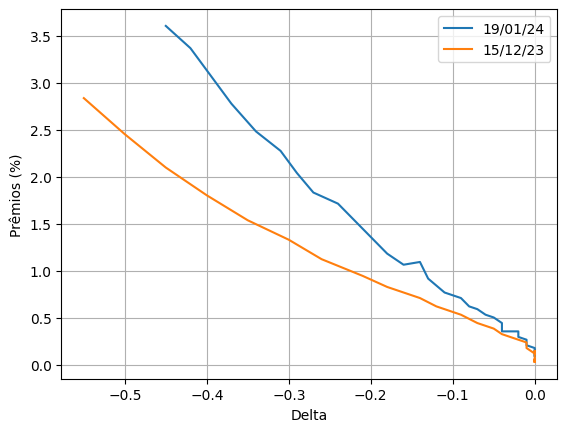

In [9]:
Ativo = 33.86
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Ask.1']]*100/Ativo,label='Ask')
#plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Bid.1']]*100/Ativo,label='Bid')
plt.plot(PUTs_OTM[['Delta.1']],PUTs_OTM[['Último.1']]*100/Ativo,label='19/01/24')
plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23')
#plt.plot(PUTs_OTM1[['Delta.1']],PUTs_OTM1[['Último.1']]*100/Ativo,label='15/12/23-Hoje')
plt.legend()
plt.grid()
plt.xlabel('Delta')
plt.ylabel('Prêmios (%)')
plt.show()

In [10]:
# A mesma análise para as Calls
CALLs_OTM = Opções[(Opções['Intrínseco']<=0.5)]
CALLs_OTM1 = Opções1[(Opções1['Intrínseco']<=0.5)]

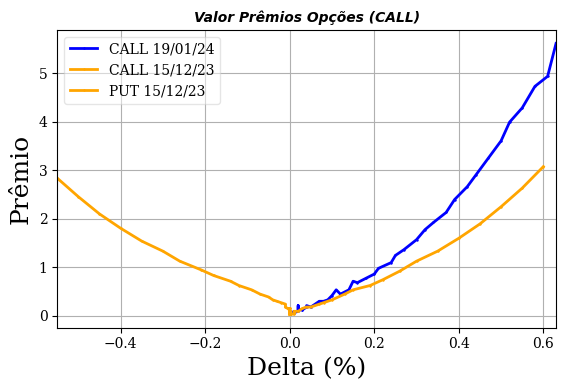

In [12]:
# A mesma análise para as Calls
#Visualizar o gráfico
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(CALLs_OTM1['Delta'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Delta.1'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+', linewidth=2, markersize=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()

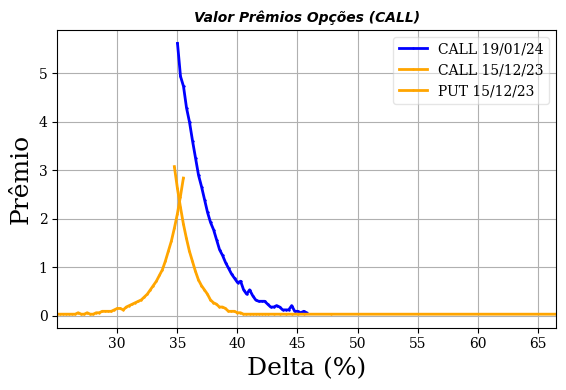

In [13]:
# A mesma análise para as Calls em função do preço do ativo
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.figure(figsize=(6,4))
plt.title('Valor Prêmios Opções (CALL)', fontsize=10, fontweight='bold', fontstyle='italic', fontfamily='sans-serif')
plt.xlabel('Delta (%)',fontsize=18)
plt.ylabel('Prêmio',fontsize=18)
plt.tight_layout()
plt.margins(x=0, y=0.05)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Ask']*100/Ativo,  label='Vendedor', color='blue',linestyle='dashed', linewidth=2)
#plt.plot(CALLs_OTM['Delta'],CALLs_OTM['Bid']*100/Ativo,  label='Comprador', color='red', linestyle='dashed', linewidth=2)
plt.plot(CALLs_OTM['Strike'],CALLs_OTM['Último']*100/Ativo,  label='CALL 19/01/24', color='blue', marker='+', linewidth=2, markersize=2)
plt.plot(CALLs_OTM1['Strike'],CALLs_OTM1['Último']*100/Ativo,  label='CALL 15/12/23', color='orange', marker='+', linewidth=2, markersize=2)
plt.plot(PUTs_OTM1['Strike'],PUTs_OTM1['Último.1']*100/Ativo,  label='PUT 15/12/23', color='orange', marker='+', linewidth=2, markersize=2)
plt.legend(fontsize=10, frameon=True, framealpha=0.5, facecolor='white')
plt.grid(True)
plt.show()